# 

### Database

- [Earth2014](http://ddfe.curtin.edu.au/models/Earth2014/) (Arc‐min shape, topography, bedrock and ice‐sheet models)
- Rivers are extracted from dem data (earth2014.5min, TRR) by topotoolbox using "topotoolbox_matlab/TRR_PlotRivers_earth2014.m"

### Software

- [TopoToolbox](https://topotoolbox.wordpress.com/) (Topographic analysis tool)




In [1]:
import scipy.io as scio
import matplotlib.pyplot as plt
import numpy as np

### load river data from mat file

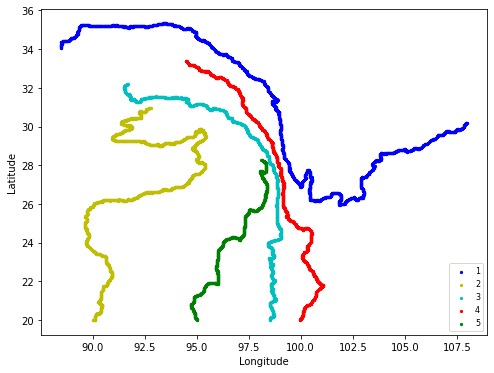

In [2]:
rivers = [1,2,3,4,5]  

labels= ['1','2','3','4','5']  
colors =['b','y','c','r','g']

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude')
for i in range(0,len(rivers)):
    fname = '../data/data_rivers/mat/river_xyd'+str(rivers[i])+'.mat'
    data  = scio.loadmat(fname) 
    
    dx = data["river_x"]
    #index_NaN = np.where(np.isnan(dx))
    #dx = np.delete(dx,index_NaN)
    
    dy = data['river_y'] 
    #dy = np.delete(dy,index_NaN)
    #elev[np.where(np.isnan(elev))]=elev[:,int(np.where(np.isnan(elev))[:][1]-1000)] 
  
    ax.scatter(dx.T,dy.T,label=labels[i],color=colors[i],s =5)
plt.legend(loc = 'lower right',prop = {'size':8}) 

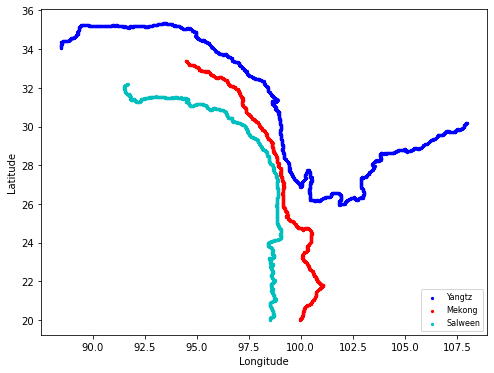

In [3]:
rivers = [1,4,3] # 'Yangtz','Mekong','Salween'
labels= ['Yangtz','Mekong','Salween']
labels2= ['Yz','Mk','Sw']
colors =['b','r','c']

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude')
for i in range(0,len(rivers)):
    fname = '../data/data_rivers/mat/river_xyd'+str(rivers[i])+'.mat'
    data  = scio.loadmat(fname) 
    
    dx  = data["river_x"]
    dy  = data['river_y'] 
    dis = data['river_d'] 

    ax.scatter(dx.T,dy.T,label=labels[i],color=colors[i],s =5)
    
    fname_save = "../data/data_rivers/River"+labels2[i]+'0.txt'
    np.savetxt(fname_save, np.column_stack((dx,dy,dis)),fmt='%3.8f %3.8f %3.8f')
plt.legend(loc = 'lower right',prop = {'size':8}) 

### reorganize the river data

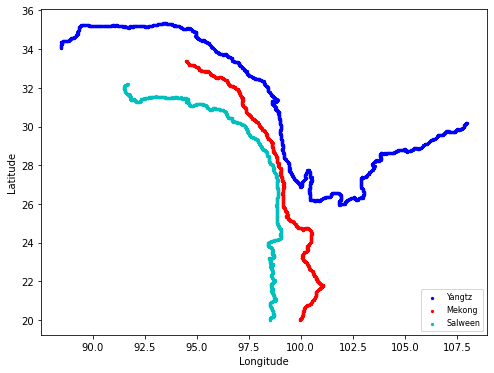

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude')
for i in range(0,len(labels)):
    fname_load = "../data/data_rivers/River"+labels2[i]+'0.txt'
    river_xyo = np.loadtxt(fname_load)
    
    river_xyo = river_xyo[np.lexsort(-river_xyo.T)]
    
    ax.scatter(river_xyo[:,0],river_xyo[:,1],label=labels[i],color=colors[i],s =5)
    
    fname_save = "../data/data_rivers/River"+labels2[i]+'.txt'
    np.savetxt(fname_save, np.column_stack((river_xyo[:,0],river_xyo[:,1],river_xyo[:,2])),fmt='%3.8f %3.8f %3.8f')  
plt.legend(loc = 'lower right',prop = {'size':8}) 

### Check the river data (compare with cartopy)

In [5]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
# cartopy parameters
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',
                                      edgecolor='Blue', facecolor="none")
coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                           edgecolor=(0.0,0.0,0.0),
                           facecolor="none")
lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor="blue", facecolor="blue")
prj_base  = ccrs.PlateCarree() 

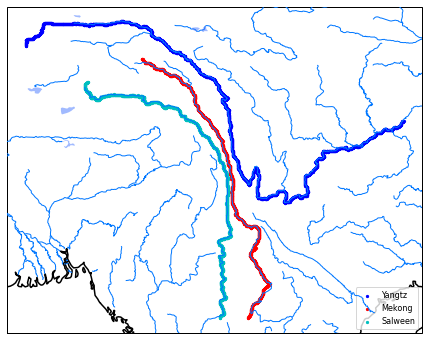

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude')
ax = plt.axes(projection=prj_base)
for i in range(0,len(labels)):
    fname_load = "../data/data_rivers/River"+labels2[i]+'.txt'
    river_xyo = np.loadtxt(fname_load)
    ax.scatter(river_xyo[:,0],river_xyo[:,1],label=labels[i],color=colors[i],s =5)
plt.legend(loc = 'lower right',prop = {'size':8}) 
ax.add_feature(coastline, linewidth=1.5, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
ax.add_feature(lakes,     linewidth=0,   edgecolor="Blue", facecolor="#4477FF", zorder=7, alpha=0.5)